In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [3]:
data = pd.read_csv('HW1_var_15.csv', sep = ';')

In [13]:
data = data.drop(['Номер варианта'], axis = 1)

**Задание 1: Исследуем распределения по данным**

In [6]:
data.shape

(10242, 43)

In [7]:
data.head()

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000015,Форма банка (без печати работодателя),Отпуск,0.0,0.34,женский,0,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000035,Свободная форма с печатью работодателя,Обучение,1.0,0.32,женский,2,0,высшее,менеджер высшего звена,...,0.0,3.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000055,Форма банка (без печати работодателя),Ремонт,0.0,0.39,мужской,1,0,*n.a.*,менеджер по продажам,...,1.0,4.0,81.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000075,Поступление зарплаты на счет,Покупка автомобиля,0.0,0.28,мужской,1,0,высшее,специалист,...,0.0,17.0,80.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000095,2НДФЛ,Покупка автомобиля,1.0,0.55,мужской,1,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data = data.replace({'*n.a.*': None})

In [15]:
column_list = list(data.columns)

In [16]:
from collections import defaultdict

In [17]:
stat_dict = defaultdict(list)
stat_dict['Feature_name'] = column_list
for col_name in column_list:
    stat_dict['Count unique value'].append(data[col_name].value_counts().count())
    stat_dict['Zero count'].append(data[data[col_name]==0].shape[0])
    nan_count = data[col_name].isna().sum()
    stat_dict['NAN count'].append(nan_count)
    stat_dict['NAN percentage value'].append(nan_count * 100 /data.shape[0])
    stat_dict['Zero percentage value'].append(
        data[data[col_name]==0].shape[0] * 100 /data.shape[0])
    stat_dict['Type'].append(data[col_name].dtype)

In [18]:
df_stat1 = pd.DataFrame(data=stat_dict)

In [19]:
df_stat1.to_csv('Описание_статистик_часть_1.csv', sep = ';', index = False)

In [20]:
df_stat1

,Feature_name,Count unique value,Zero count,NAN count,NAN percentage value,Zero percentage value,Type
0,ID,10242,0,0,0.000000,0.000000,int64
1,INCOME_BASE_TYPE,4,0,54,0.527241,0.000000,object
2,CREDIT_PURPOSE,10,0,0,0.000000,0.000000,object
3,INSURANCE_FLAG,2,3954,1,0.009764,38.605741,float64
4,DTI,58,2,115,1.122828,0.019527,float64
5,SEX,2,0,0,0.000000,0.000000,object
6,FULL_AGE_CHILD_NUMBER,8,6101,0,0.000000,59.568444,int64
7,DEPENDANT_NUMBER,4,10204,0,0.000000,99.628979,int64
8,EDUCATION,8,0,38,0.371021,0.000000,object
9,EMPL_TYPE,9,0,8,0.078110,0.000000,object


**Вывод:** Признаки под номерами 11-42 в таблице выше имеют очень большую долю пропусков. Признаки, которые имеют больше 50% пропусков лучше не использовать для анализа, так как скорее всего не получится корректно заполнить их, особенно если они бинарные. Либо можно убрать все строчки, в которых значения данных признаков пропущены, но это может привести к сильному уменьшению объема данных для дальнейшего анализа.

Признак DEPENDANT_NUMBER - по сути является константынм (99,6% нулей), следовательно вряд ли он поможет как-то при дальнейшем анализе, следовательно его можно не использовать. 

**2. Рассчет среднего значения, медианы, стандартного отклонения, минимума, максимума:**

In [21]:
numeric_feat = ['DTI', 'FULL_AGE_CHILD_NUMBER','DEPENDANT_NUMBER', 'BANKACCOUNT_FLAG', 'Period_at_work',
              'age', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 
              'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc',
              'numAccountActiveAll', 'sum_of_paym_months', 'all_credits', 'Active_not_cc',
              'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan']

In [22]:
stat_dict_2 = defaultdict(list)
stat_dict_2['Feature_name'] = numeric_feat
for col_name in numeric_feat:
    stat_dict_2['Mean'].append(data[col_name].mean())
    stat_dict_2['Median'].append(data[col_name].median())
    stat_dict_2['Std'].append(data[col_name].std())
    stat_dict_2['Minimun'].append(data[col_name].min())
    stat_dict_2['Maximum'].append(data[col_name].max())

In [23]:
df_stat2 = pd.DataFrame(data=stat_dict_2)

In [20]:
df_stat2

,Feature_name,Mean,Median,Std,Minimun,Maximum
0,DTI,0.386783,0.400000,0.136640,0.0,0.59
1,FULL_AGE_CHILD_NUMBER,0.550478,0.000000,0.761874,0.0,7.00
2,DEPENDANT_NUMBER,0.004784,0.000000,0.085444,0.0,3.00
3,BANKACCOUNT_FLAG,0.381091,0.000000,0.867026,0.0,4.00
4,Period_at_work,66.700669,45.000000,67.128069,6.0,536.00
5,age,36.521712,35.000000,8.673566,23.0,63.00
6,max90days,1.595514,1.000000,1.894617,0.0,22.00
7,max60days,1.147461,1.000000,1.584125,0.0,22.00
8,max30days,0.863367,0.000000,1.366699,0.0,15.00
9,max21days,0.643465,0.000000,1.154616,0.0,12.00


**Вывод:** Выбросов из таблицы выше особо не наблюдается. Медиана почти везде практически совпадает со средним по по выборке, что свидетельствует о нормальном распределении количественных признаков. Признак min_MnthAfterLoan имеет минимальное значение -1, что точно не является корректным, поэтому такие строки должны быть удалены.

In [21]:
df_stat2.to_csv('Описание_статистик_часть_2.csv',sep = ';', index = False)

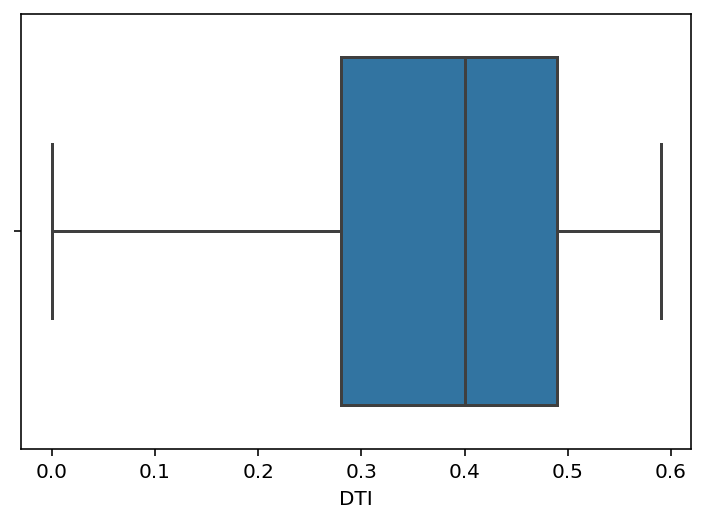

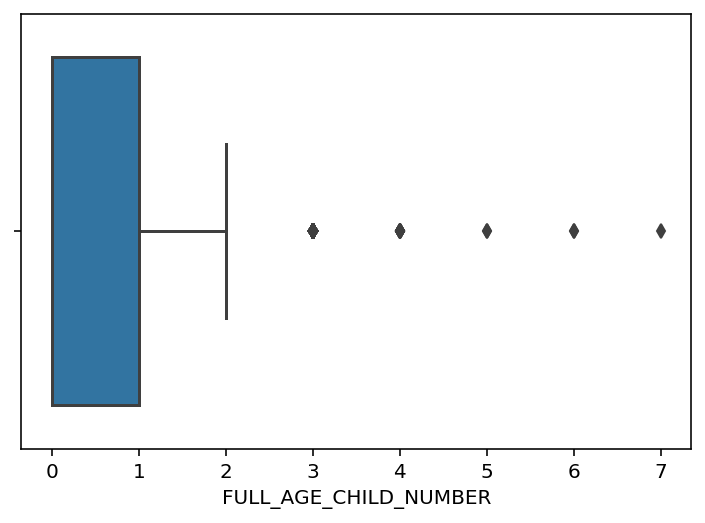

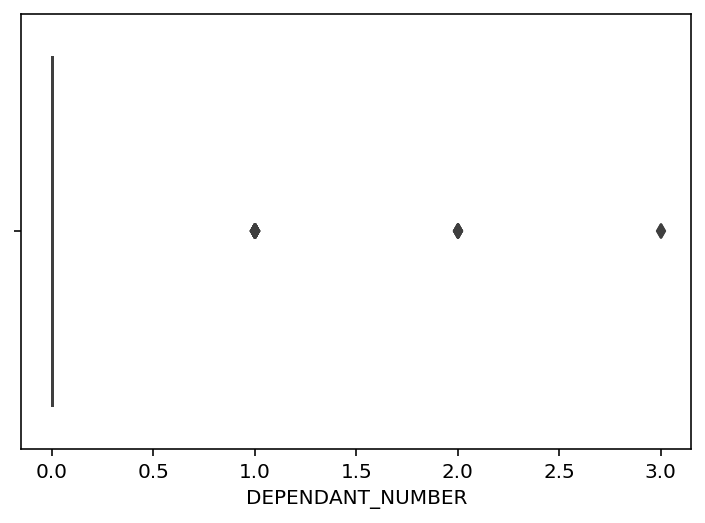

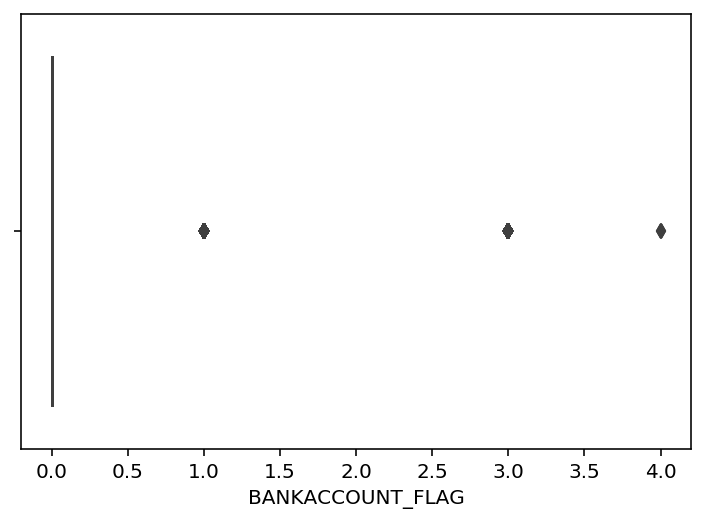

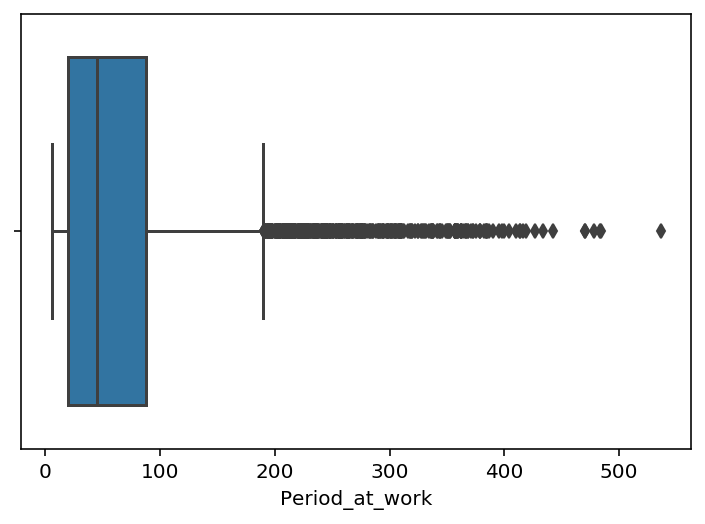

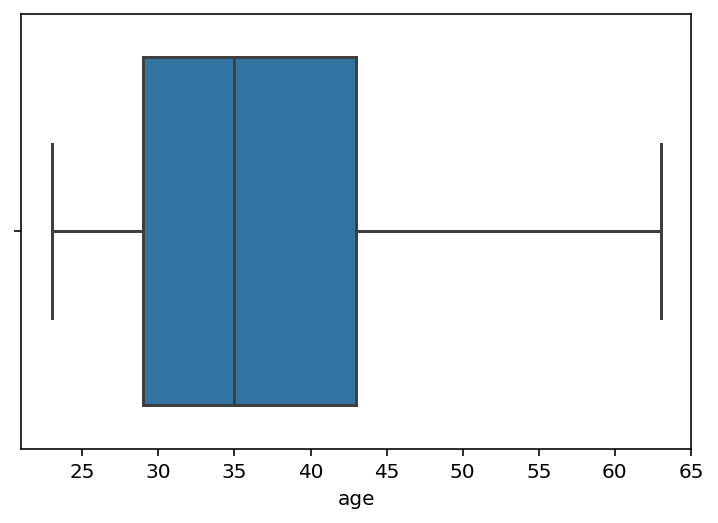

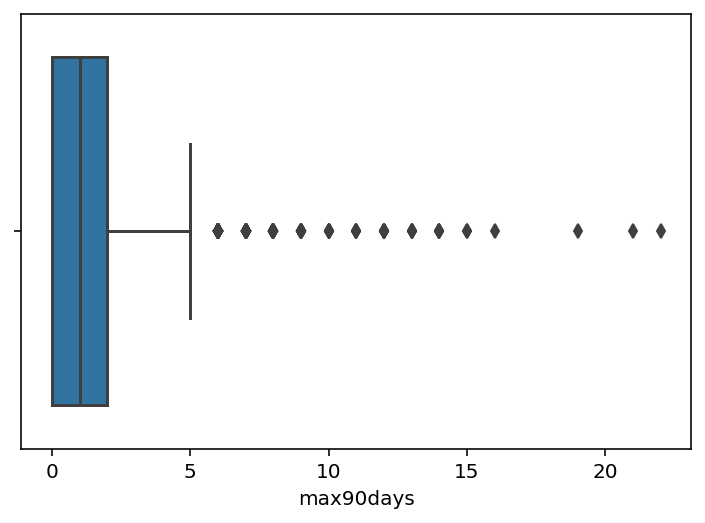

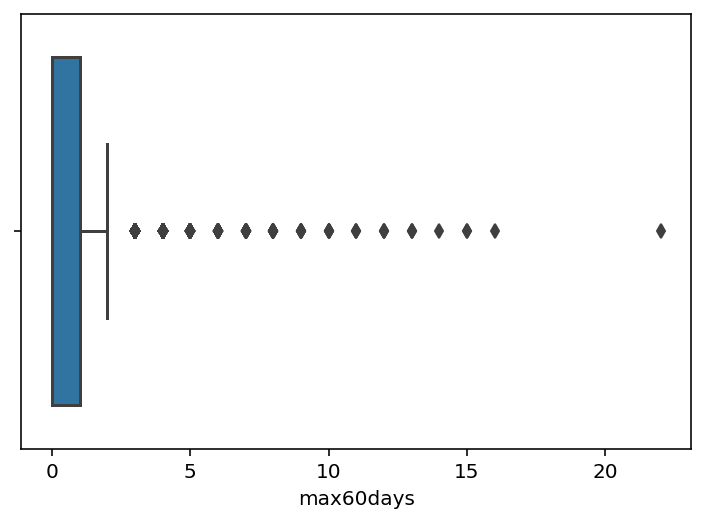

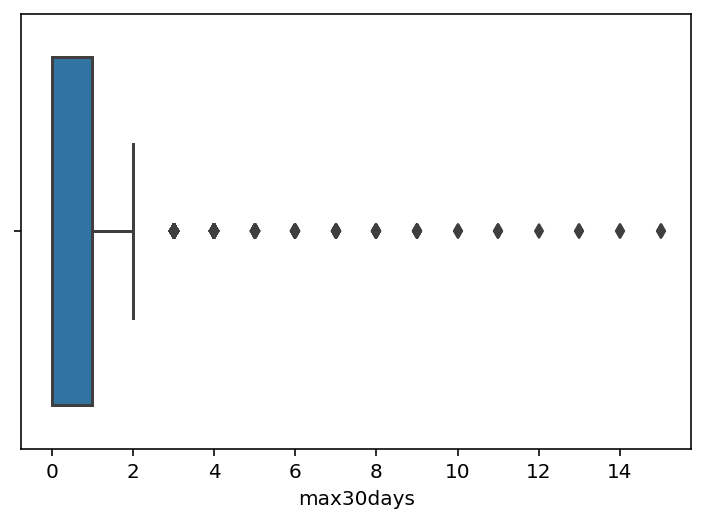

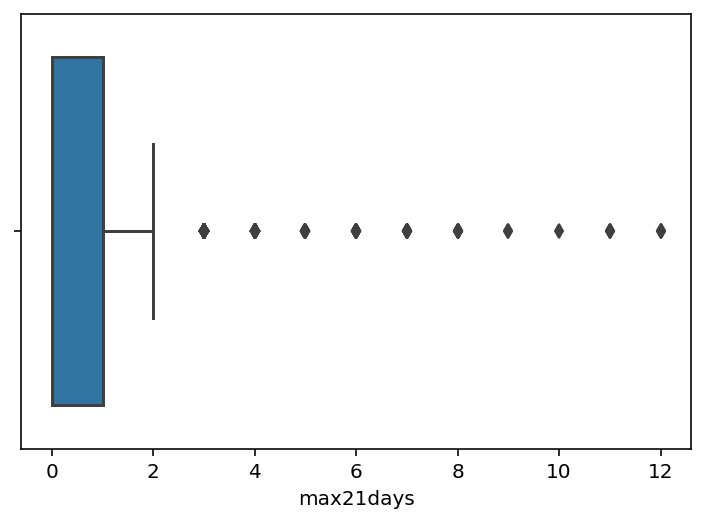

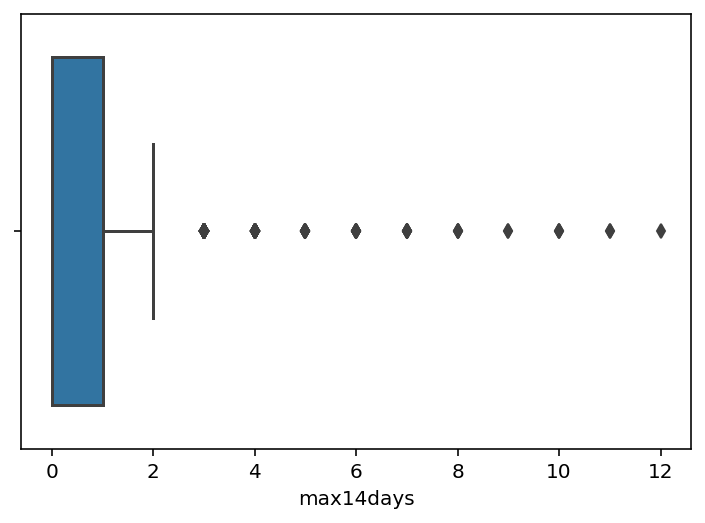

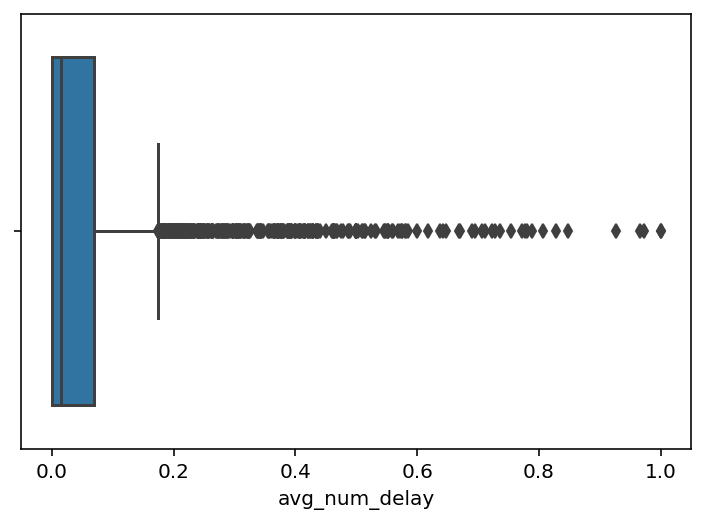

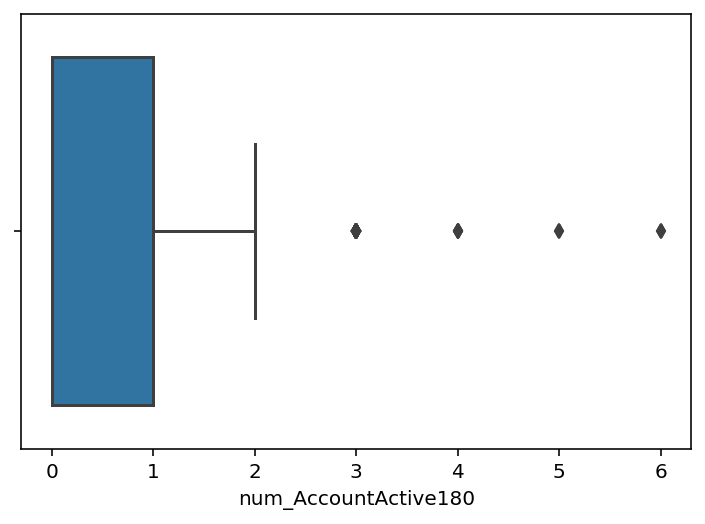

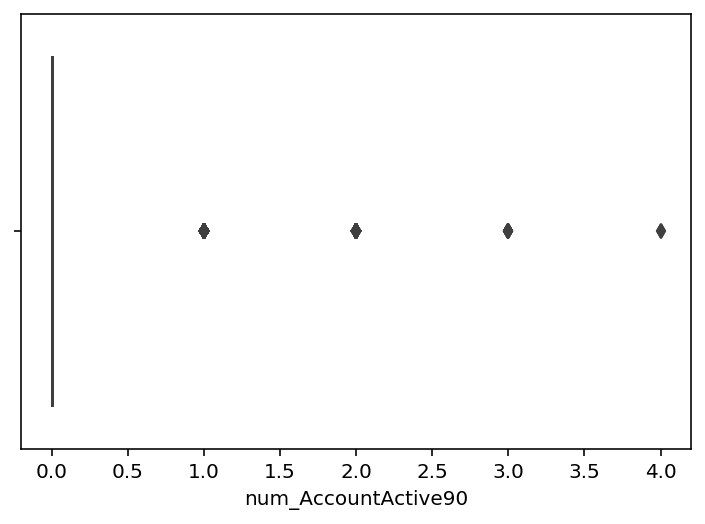

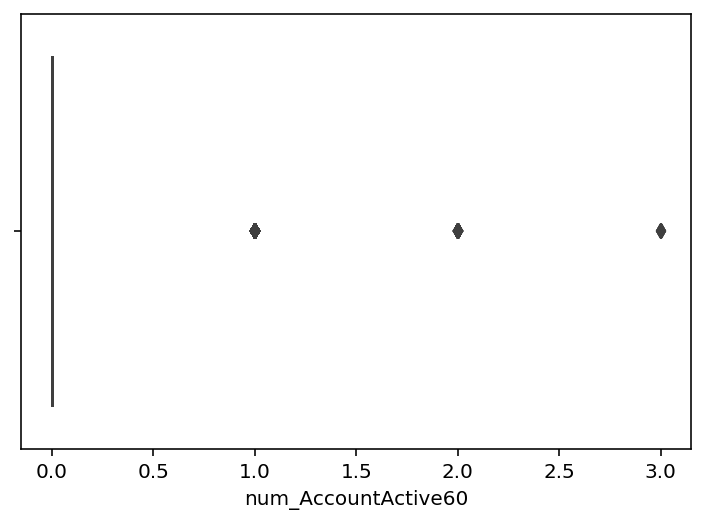

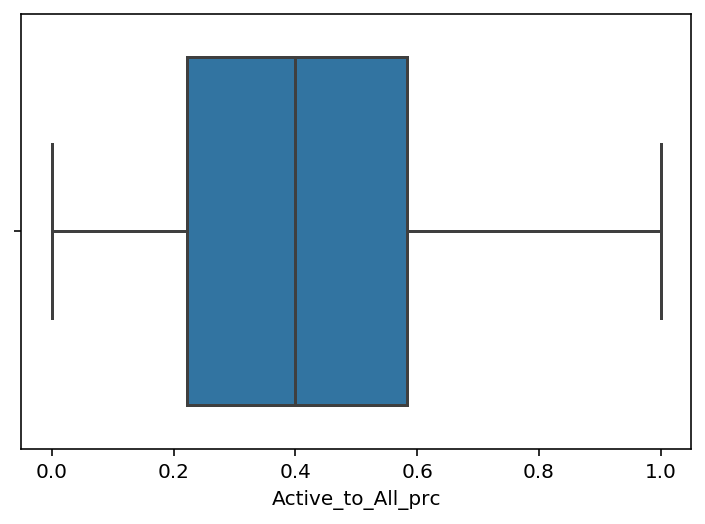

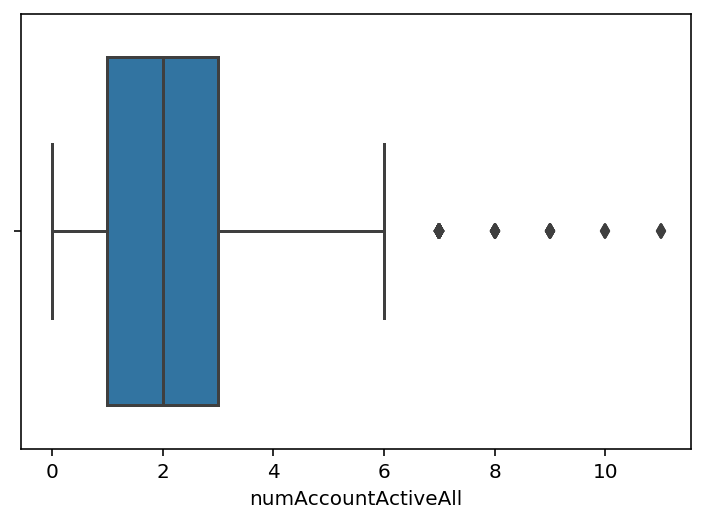

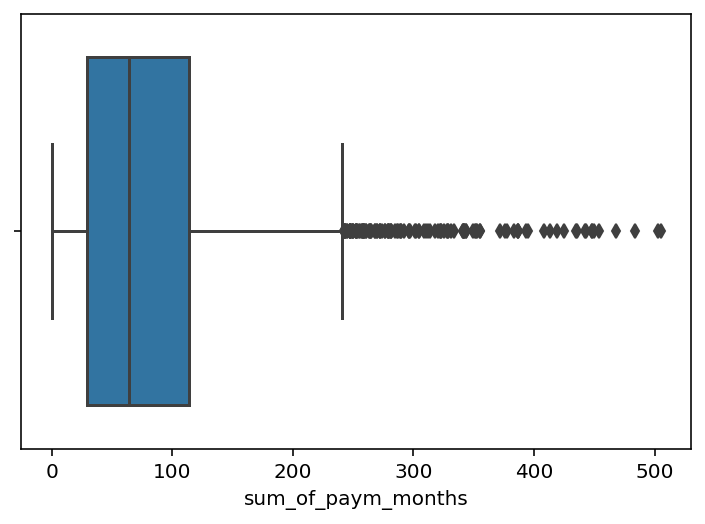

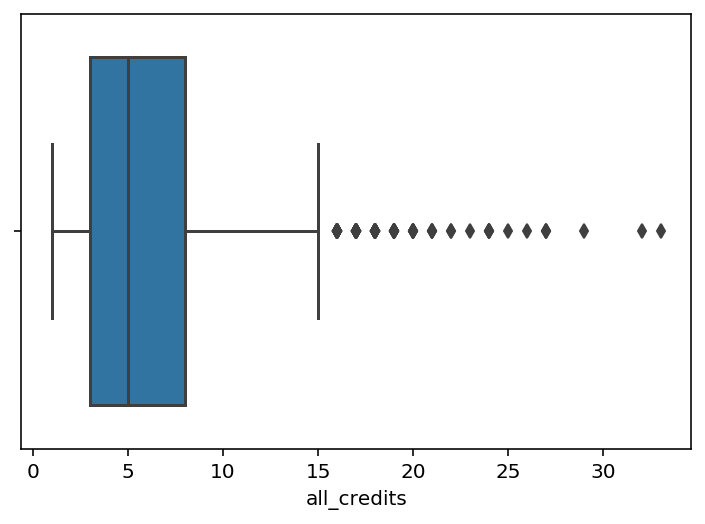

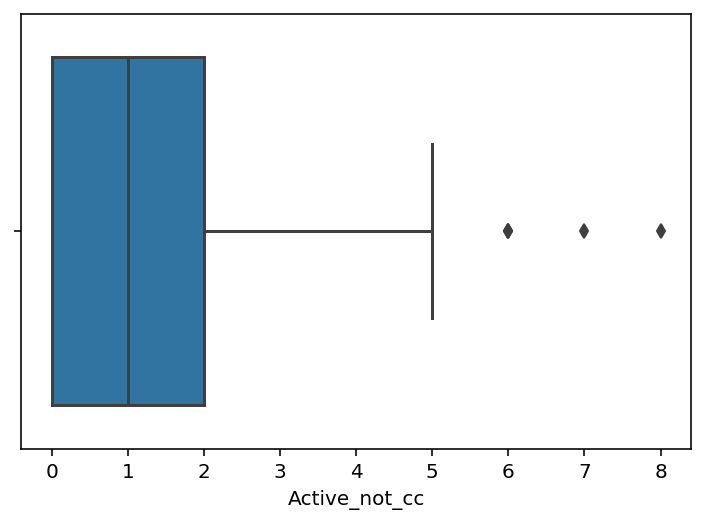

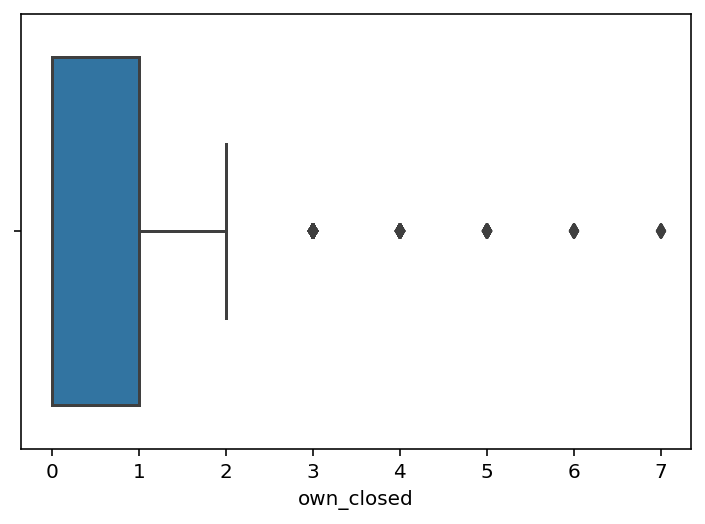

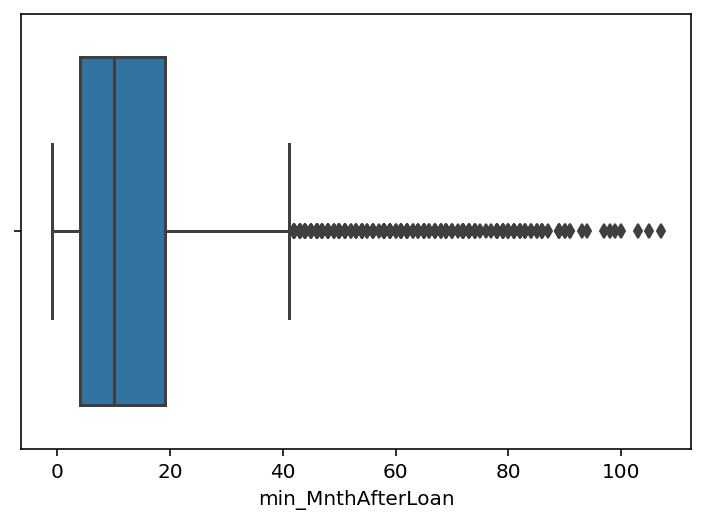

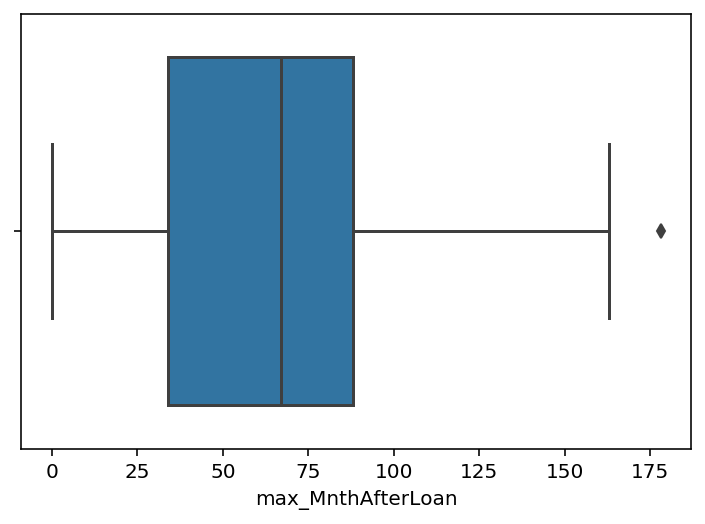

In [24]:
import seaborn as sns
for numeric_col in numeric_feat:
    ax = sns.boxplot(x=data[numeric_col])
    plt.show()

**3. Исследуем распределение категориальных переменных**

In [25]:
%config InlineBackend.figure_format = 'retina'

In [26]:
cat_feat = list(data.select_dtypes(include='object').columns)

In [27]:
cat_feat

['INCOME_BASE_TYPE',
 'CREDIT_PURPOSE',
 'SEX',
 'EDUCATION',
 'EMPL_TYPE',
 'EMPL_SIZE',
 'EMPL_PROPERTY',
 'EMPL_FORM',
 'FAMILY_STATUS']

In [28]:
data_copy = data.copy()

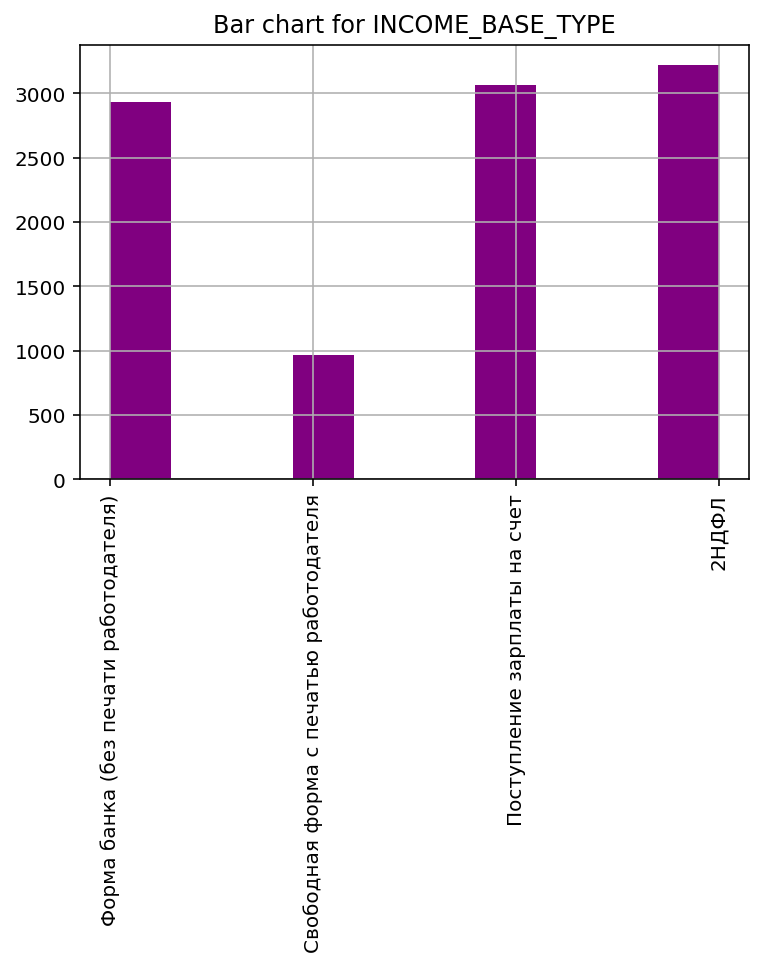

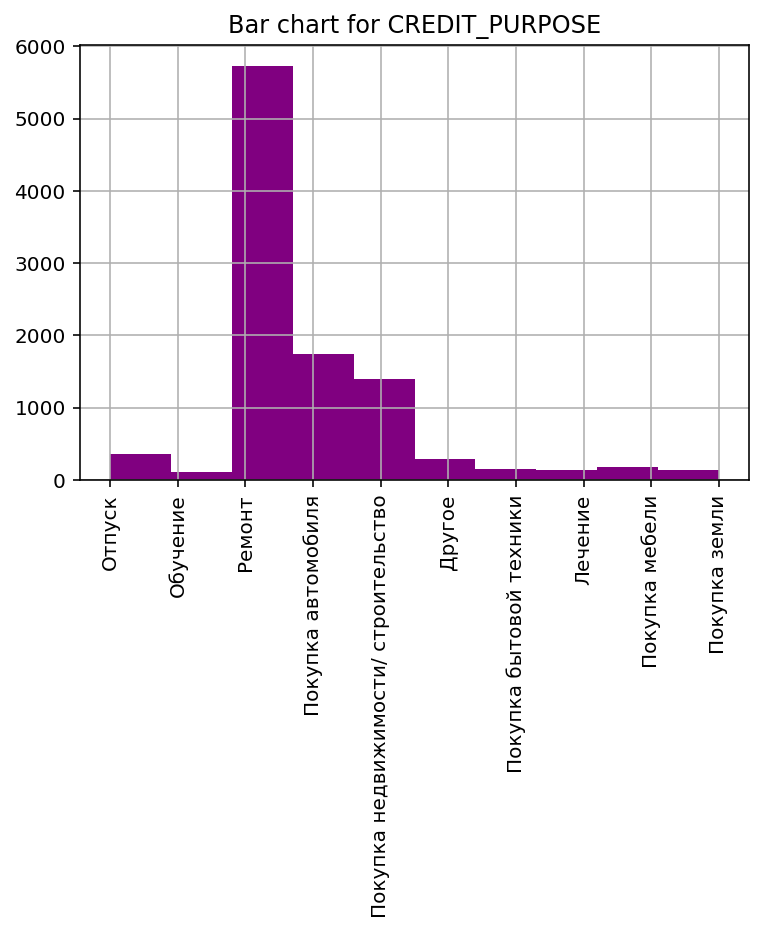

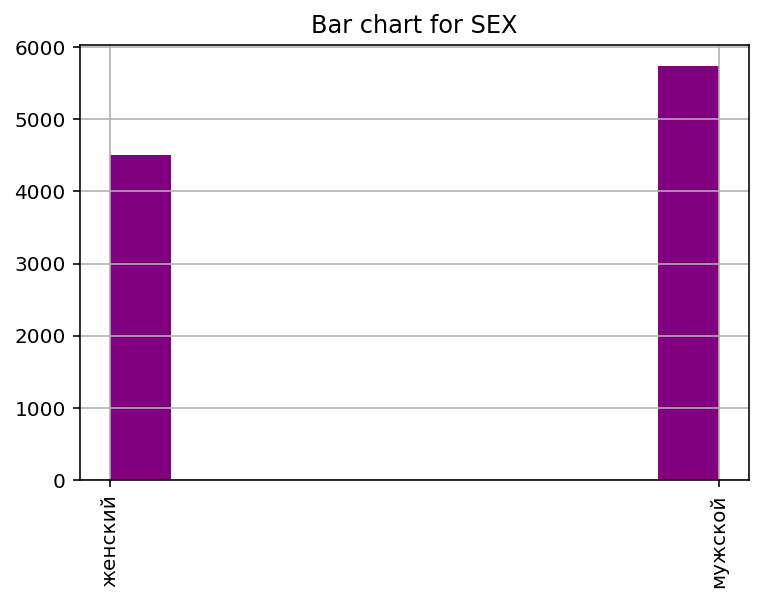

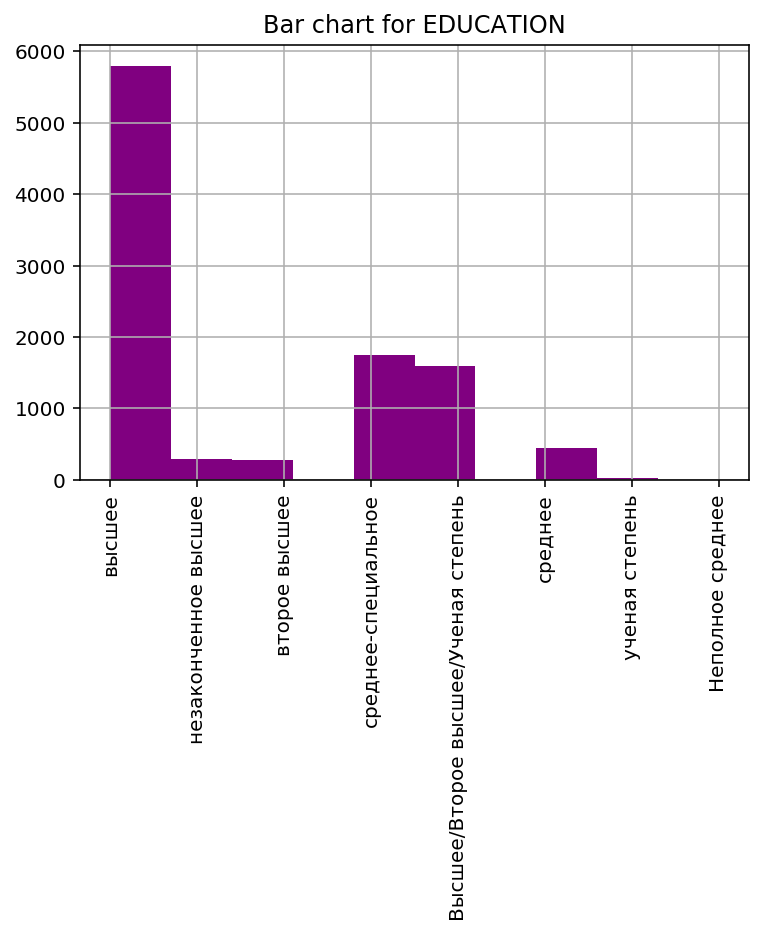

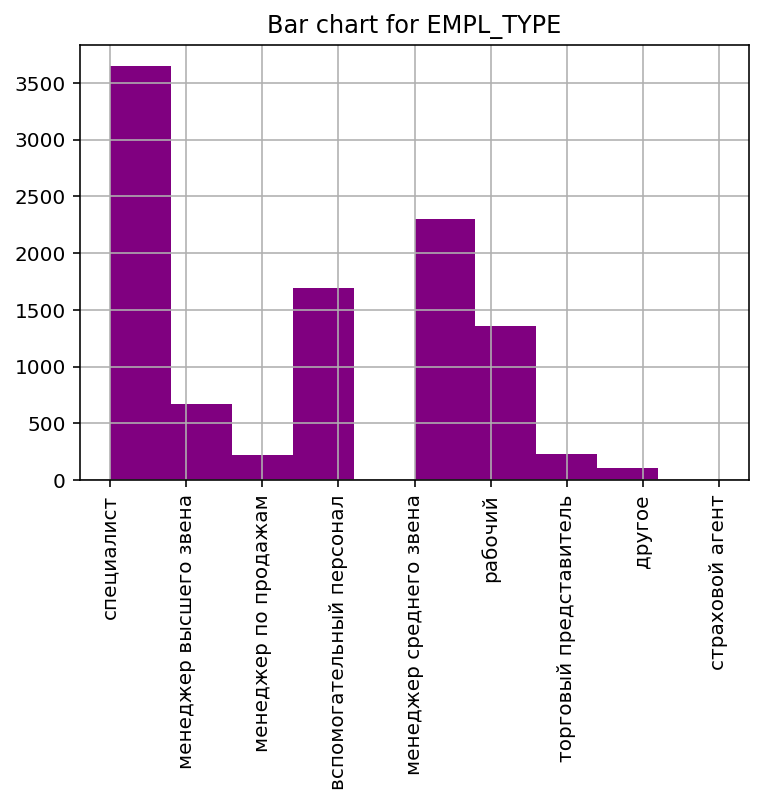

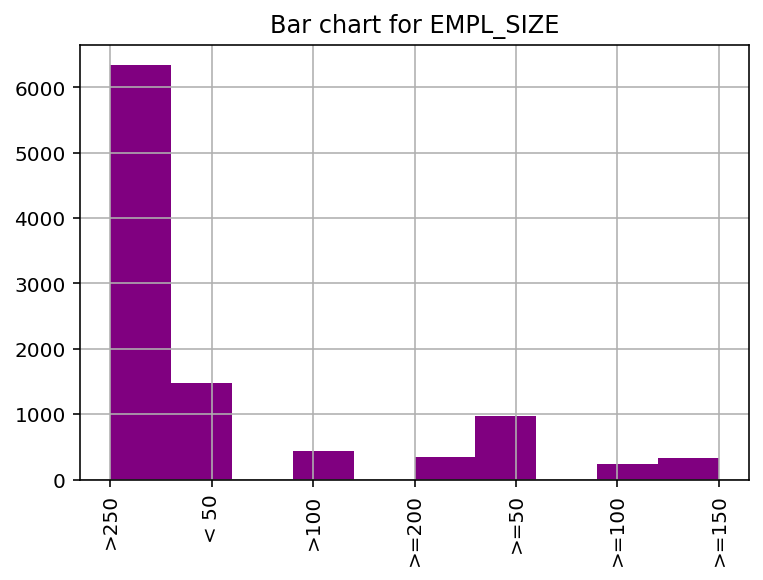

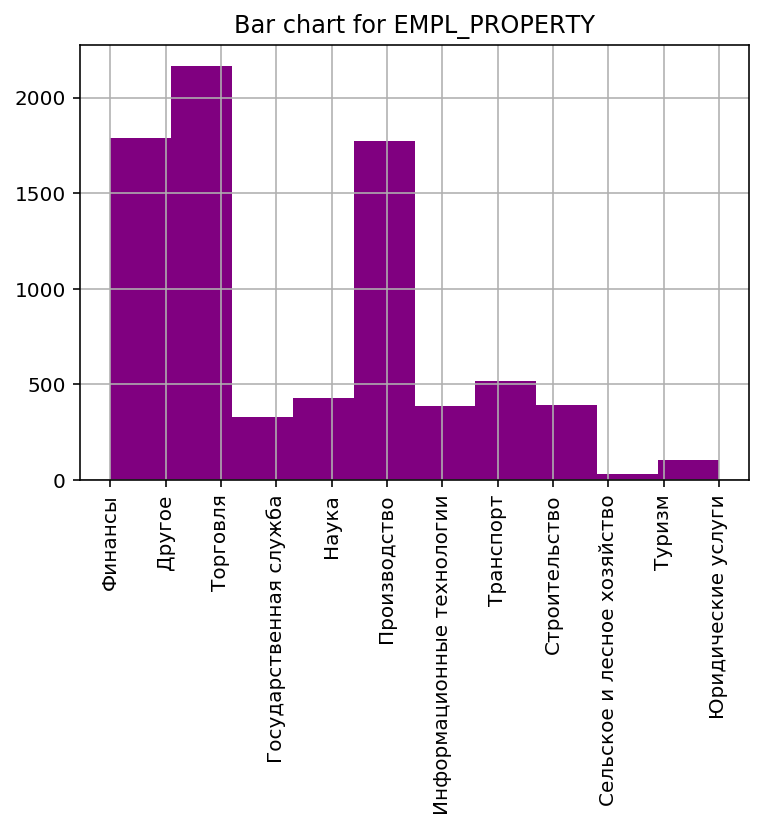

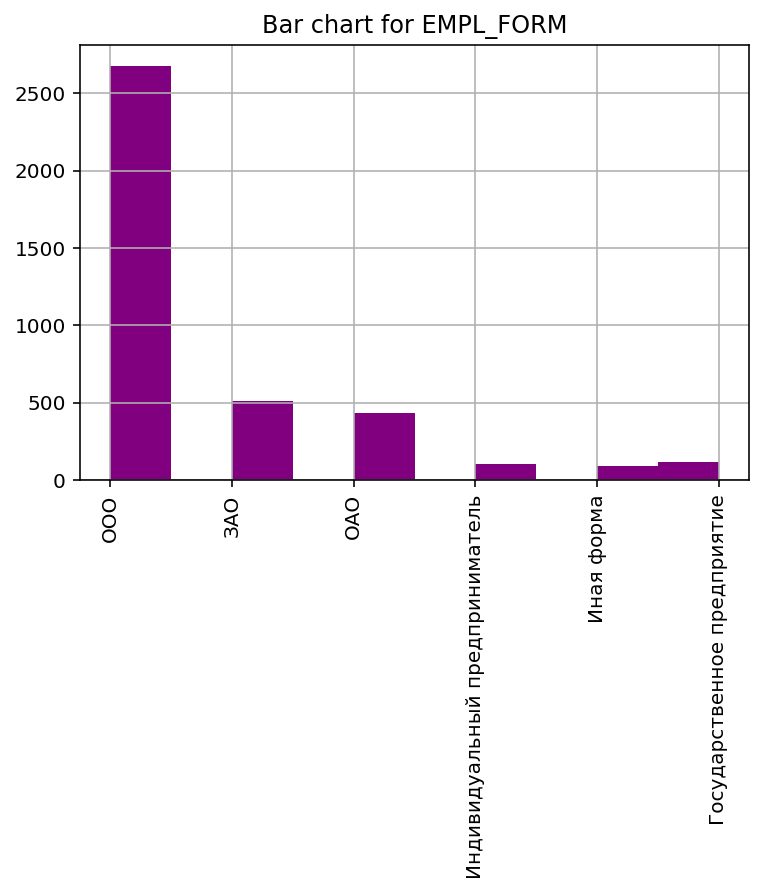

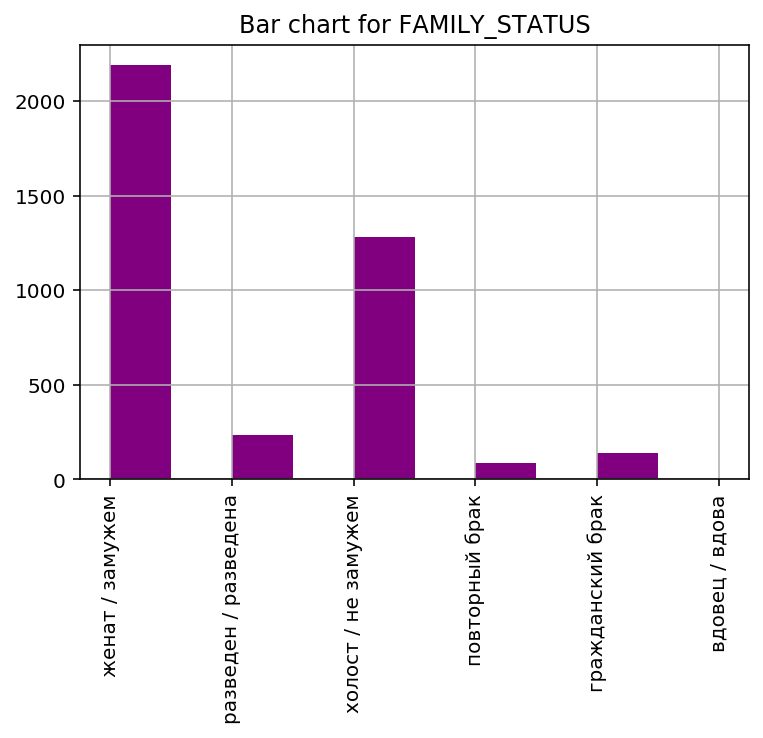

In [29]:
for col_name in cat_feat:
    plt.hist(data[~data[col_name].isna()][col_name], color = 'purple')
    plt.xticks(rotation=90)
    plt.grid()
    plt.title('Bar chart for ' + col_name)
    plt.show()

In [32]:
data['EMPL_SIZE'].value_counts()

>250     6336
< 50     1472
>=50      970
>100      432
>=200     345
>=150     329
>=100     244
Name: EMPL_SIZE, dtype: int64

**Вывод:** В признаке EMPL_SIZE категории >100 и >=100 можно объединить в одну категорию.

**Задание 2: Проверка на полноту данных по клиентам**

In [30]:
data.shape[1]

43

In [31]:
id_perc_nan = data.set_index(['ID']).isna().sum(axis=1)*100/42

In [32]:
id_perc_nan.to_dict()

{1000015: 66.66666666666667,
 1000035: 0.0,
 1000055: 2.380952380952381,
 1000075: 0.0,
 1000095: 66.66666666666667,
 1000115: 66.66666666666667,
 1000135: 0.0,
 1000155: 76.19047619047619,
 1000175: 66.66666666666667,
 1000195: 0.0,
 1000215: 0.0,
 1000235: 66.66666666666667,
 1000255: 76.19047619047619,
 1000275: 0.0,
 1000295: 66.66666666666667,
 1000315: 0.0,
 1000335: 0.0,
 1000355: 76.19047619047619,
 1000375: 0.0,
 1000395: 66.66666666666667,
 1000415: 0.0,
 1000435: 0.0,
 1000455: 0.0,
 1000475: 76.19047619047619,
 1000495: 0.0,
 1000515: 0.0,
 1000535: 66.66666666666667,
 1000555: 66.66666666666667,
 1000575: 76.19047619047619,
 1000595: 66.66666666666667,
 1000615: 66.66666666666667,
 1000635: 66.66666666666667,
 1000655: 71.42857142857143,
 1000675: 66.66666666666667,
 1000695: 0.0,
 1000715: 0.0,
 1000735: 66.66666666666667,
 1000755: 0.0,
 1000775: 76.19047619047619,
 1000795: 0.0,
 1000815: 0.0,
 1000835: 2.380952380952381,
 1000855: 66.66666666666667,
 1000875: 0.0,
 100

**Задание 3: Подготовка витрины**

In [33]:
mask = data.isna().sum(axis=1)*100/42 < 50

In [34]:
data[mask]

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
1,1000035,Свободная форма с печатью работодателя,Обучение,1.0,0.32,женский,2,0,высшее,менеджер высшего звена,...,0.0,3.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000055,Форма банка (без печати работодателя),Ремонт,0.0,0.39,мужской,1,0,None,менеджер по продажам,...,1.0,4.0,81.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000075,Поступление зарплаты на счет,Покупка автомобиля,0.0,0.28,мужской,1,0,высшее,специалист,...,0.0,17.0,80.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1000135,Поступление зарплаты на счет,Покупка автомобиля,1.0,0.18,мужской,0,0,второе высшее,специалист,...,0.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1000195,Поступление зарплаты на счет,Отпуск,1.0,0.17,мужской,0,0,высшее,специалист,...,1.0,12.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,1204615,Форма банка (без печати работодателя),Ремонт,0.0,0.29,мужской,0,0,высшее,специалист,...,2.0,8.0,75.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10231,1204635,2НДФЛ,Ремонт,1.0,0.26,мужской,0,0,среднее-специальное,вспомогательный персонал,...,0.0,30.0,78.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10232,1204655,Поступление зарплаты на счет,Лечение,1.0,0.59,женский,0,0,высшее,вспомогательный персонал,...,0.0,5.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10235,1204715,Поступление зарплаты на счет,Покупка недвижимости/ строительство,1.0,0.46,мужской,0,0,высшее,вспомогательный персонал,...,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
data_new = data[mask]

In [62]:
data_new.isna().sum()

ID                        0
INCOME_BASE_TYPE          0
CREDIT_PURPOSE            0
INSURANCE_FLAG            0
DTI                       1
SEX                       0
FULL_AGE_CHILD_NUMBER     0
DEPENDANT_NUMBER          0
EDUCATION                14
EMPL_TYPE                 0
EMPL_SIZE                 1
BANKACCOUNT_FLAG          0
Period_at_work            1
age                       0
EMPL_PROPERTY             0
EMPL_FORM                 0
FAMILY_STATUS             0
max90days                 4
max60days                 4
max30days                 4
max21days                 4
max14days                 4
avg_num_delay            14
if_zalog                  0
num_AccountActive180      0
num_AccountActive90       0
num_AccountActive60       0
Active_to_All_prc         0
numAccountActiveAll       0
numAccountClosed          0
sum_of_paym_months        0
all_credits               0
Active_not_cc             0
own_closed                0
min_MnthAfterLoan         0
max_MnthAfterLoan   

In [63]:
data_new['EMPL_SIZE'].value_counts()

>250    2774
< 50     854
Name: EMPL_SIZE, dtype: int64

In [64]:
data_new = data_new[data_new['min_MnthAfterLoan'] != -1]

In [65]:
data_new['EDUCATION'].value_counts()

высшее                                 2029
Высшее/Второе высшее/Ученая степень     632
среднее-специальное                     572
среднее                                 144
незаконченное высшее                    124
второе высшее                            87
ученая степень                            5
Неполное среднее                          3
Name: EDUCATION, dtype: int64

In [66]:
data_new['EDUCATION'] = data_new['EDUCATION'].replace({'высшее': 'Высшее/Второе высшее/Ученая степень', 
                                                       'ученая степень': 'Высшее/Второе высшее/Ученая степень',
                                                      'второе высшее':'Высшее/Второе высшее/Ученая степень',
                                                      'Неполное среднее': 'среднее'})

In [67]:
data_new['EDUCATION'].value_counts()

Высшее/Второе высшее/Ученая степень    2753
среднее-специальное                     572
среднее                                 147
незаконченное высшее                    124
Name: EDUCATION, dtype: int64

In [68]:
data_new['DTI'].fillna(data_new['DTI'].mean(),inplace = True)

In [69]:
data_new['EDUCATION'].fillna('Высшее/Второе высшее/Ученая степень', inplace = True)

In [70]:
data['EMPL_SIZE'].value_counts()

>250     6336
< 50     1472
>=50      970
>100      432
>=200     345
>=150     329
>=100     244
Name: EMPL_SIZE, dtype: int64

In [71]:
data_new['EMPL_SIZE'].fillna('>250', inplace = True)

In [72]:
col_with_nan = ['max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 'Period_at_work']
for col in col_with_nan:
    data_new[col].fillna(data_new[col].mean(), inplace = True)                           

In [73]:
data_new.isna().sum().any()

False

Перевод категориальных признаков в целочисленные

In [75]:
data_new['EDUCATION'].unique()

array(['Высшее/Второе высшее/Ученая степень', 'среднее-специальное',
       'среднее', 'незаконченное высшее'], dtype=object)

In [76]:
data_new['FAMILY_STATUS'].unique()

array(['женат / замужем', 'разведен / разведена', 'холост / не замужем',
       'повторный брак', 'гражданский брак', 'вдовец / вдова'],
      dtype=object)

In [77]:
data_new['EMPL_SIZE'].value_counts()

>250    2758
< 50     852
Name: EMPL_SIZE, dtype: int64

In [48]:
cat_feat = list(data.select_dtypes(include='object').columns)

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in cat_feat:
    data_new[feat] = le.fit_transform(data_new[feat])

In [212]:
data_new.to_csv('data_new.csv', index = False)

Что было исправлено:

-убрать клиентов с большим количеством пропусков

-В признаке EMPL_SIZE категории >100 и >=100 можно объединить в одну категорию.

-Education 

-Признак min_MnthAfterLoan имеет минимальное значение -1

-Заполнены пропуски

**Часть 2:** Сегментация данных

**Decision Tree**

In [7]:
data_new = pd.read_csv('data_new.csv')

In [9]:
target = data_new['CREDIT_PURPOSE']

In [10]:
df = data_new.drop(['CREDIT_PURPOSE', 'ID'], axis = 1)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth = 12, max_leaf_nodes = 13)
dtree.fit(df,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=13,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

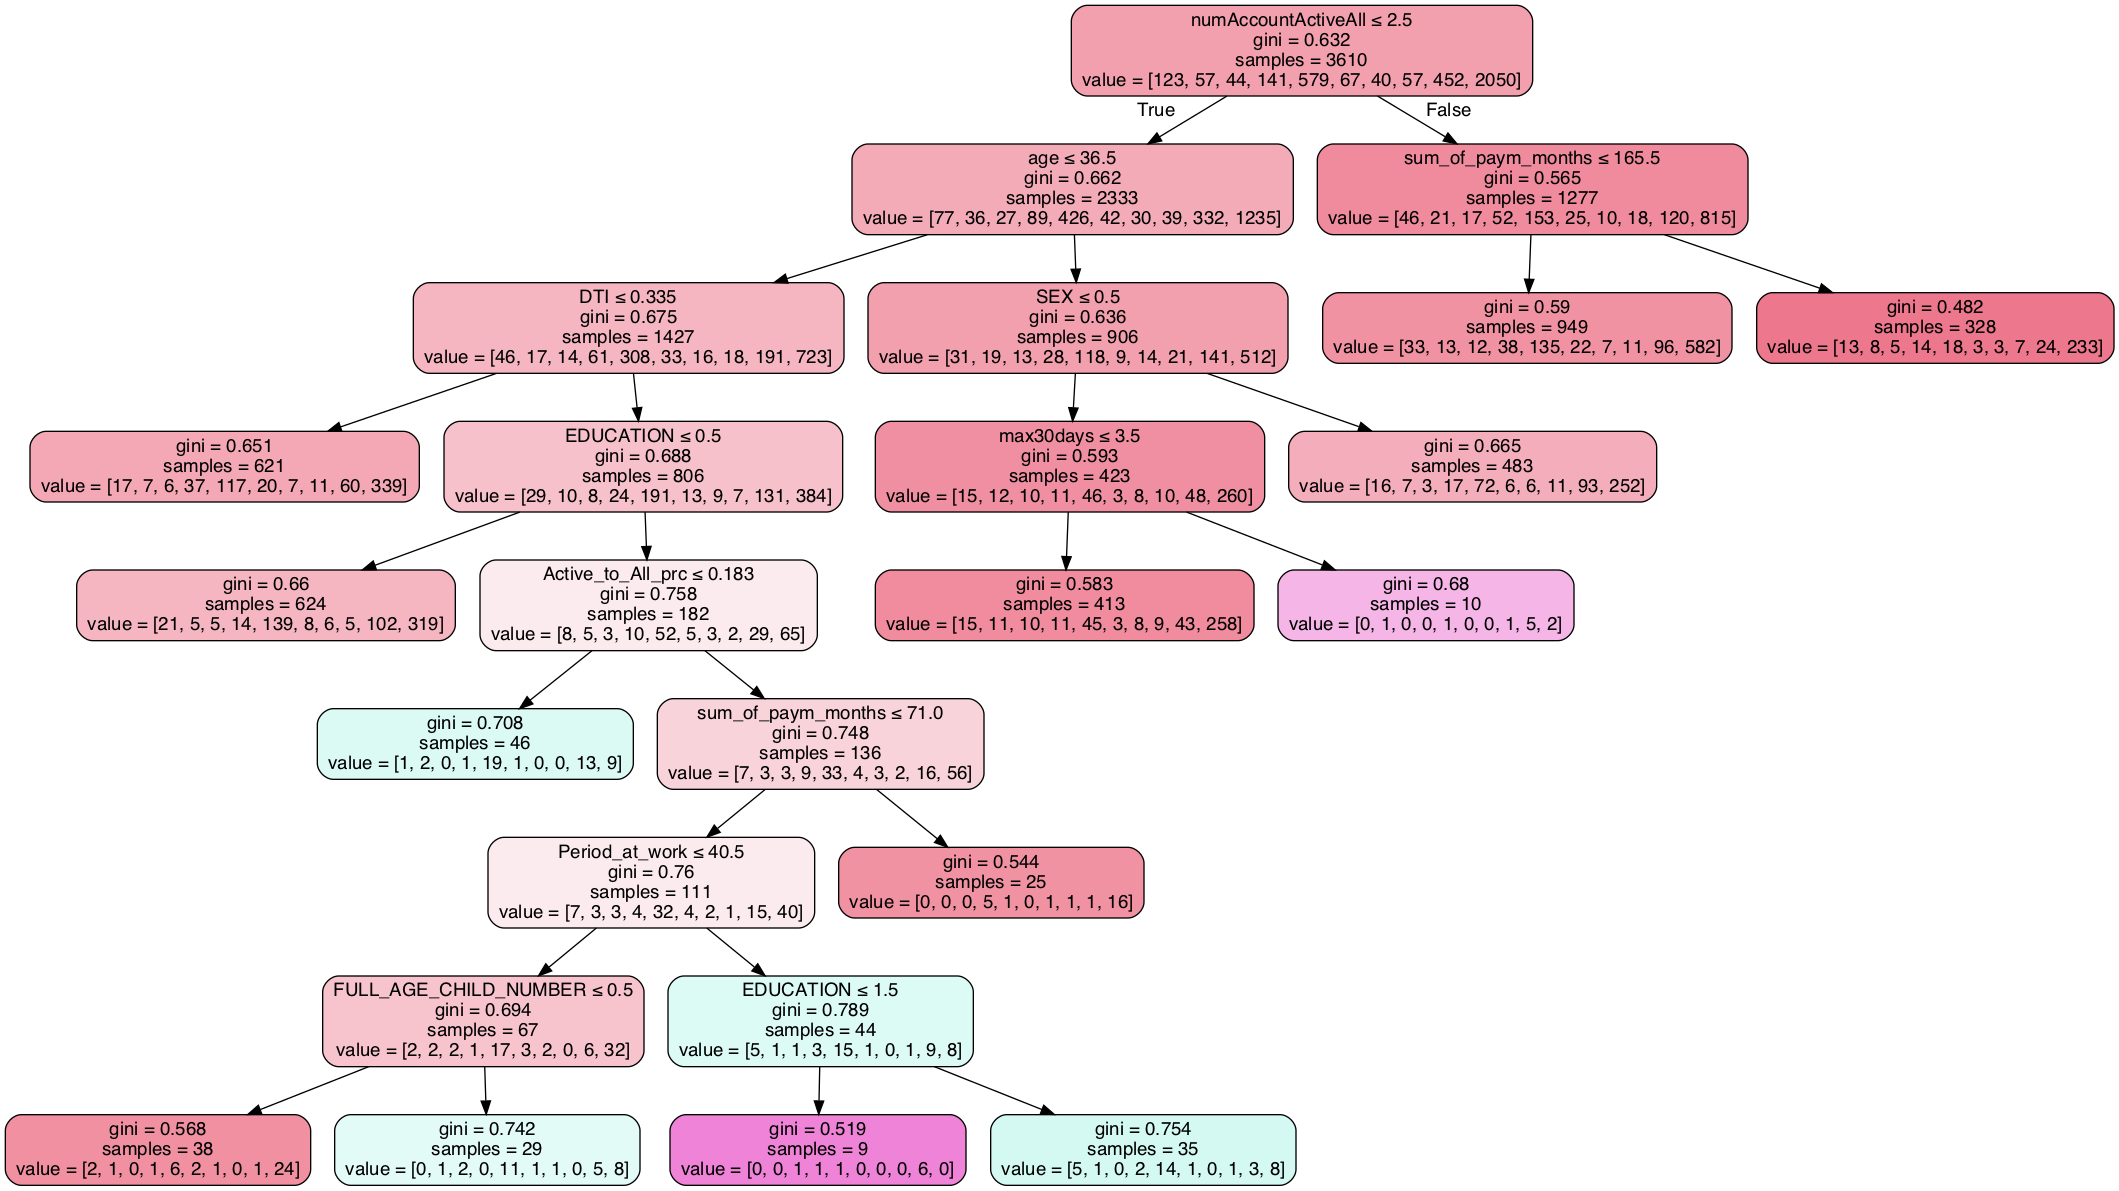

In [285]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                feature_names = list(df.columns),
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")
Image(graph.create_png())

In [61]:
y_pred = dtree.predict(df)

In [62]:
from sklearn.metrics import f1_score
f1_score(target, y_pred, average = 'micro')

0.5756232686980609

In [69]:
feat_importances = dict(zip(df.columns, dtree.feature_importances_))

In [70]:
sorted_x = sorted(feat_importances.items(), key=lambda kv: kv[1])

In [71]:
sorted_x

[('INCOME_BASE_TYPE', 0.0),
 ('INSURANCE_FLAG', 0.0),
 ('DEPENDANT_NUMBER', 0.0),
 ('EMPL_TYPE', 0.0),
 ('EMPL_SIZE', 0.0),
 ('BANKACCOUNT_FLAG', 0.0),
 ('EMPL_PROPERTY', 0.0),
 ('EMPL_FORM', 0.0),
 ('FAMILY_STATUS', 0.0),
 ('max90days', 0.0),
 ('max60days', 0.0),
 ('max21days', 0.0),
 ('max14days', 0.0),
 ('avg_num_delay', 0.0),
 ('if_zalog', 0.0),
 ('num_AccountActive180', 0.0),
 ('num_AccountActive90', 0.0),
 ('num_AccountActive60', 0.0),
 ('numAccountClosed', 0.0),
 ('all_credits', 0.0),
 ('Active_not_cc', 0.0),
 ('own_closed', 0.0),
 ('min_MnthAfterLoan', 0.0),
 ('max_MnthAfterLoan', 0.0),
 ('dlq_exist', 0.0),
 ('thirty_in_a_year', 0.0),
 ('sixty_in_a_year', 0.0),
 ('ninety_in_a_year', 0.0),
 ('thirty_vintage', 0.0),
 ('sixty_vintage', 0.0),
 ('ninety_vintage', 0.0),
 ('Period_at_work', 0.05350690300325884),
 ('FULL_AGE_CHILD_NUMBER', 0.05669084062688395),
 ('max30days', 0.057572160433673567),
 ('Active_to_All_prc', 0.06196101107529346),
 ('SEX', 0.06491249433006897),
 ('DTI', 0.0

**Вывод:** Дерево решений хорошо подходит для таких задач, так как наглядно разделяет данные на сегменты по наиболее значимым признакам. В результате было получено 12 сегментов. Далее будут описаны основные из них.

**Сегмент 1:** Люди старше 37 лет женского пола с количеством запросов в бюро кредитных историй за последние 30 дней < 4.

**Сегмент 2:** Люди моложе 37 лет с количеством открытых счетов < 3, с отношением долга к доходам < 0.335

**Сегмент 3:** Люди моложе 37 лет с количеством открытых счетов < 3, с отношением долга к доходам > 0.335, с высшим/вторым высшим/научной степенью образованием, с суммой ежемесячной выплаты >71 тысяча рублей. 

И так далее. Выгепостроенное дерево вполне себе четко описывает все полученные сегменты.

**Сегмент 4:** Люди моложе 37 лет с количеством открытых счетов < 3, с отношением долга к доходам > 0.335, со средним-специальным, средним или незаконченным высшим образованием.

**Сегментация без учителя в SAS : Выводы**

Результаты сегментации приложены к отчету в виде pdf файла и изображений каждого из кластеров по отдельности. 

В данном случае очень удобно было использовать сегментацию для анализа, так как во-первых, этот метод напрямую решает поставленную задачу - разделить на отдельные группы клиентов банка. Во-вторых, плюсом метода является его хорошая интерпретируемость. А также этот способ относится к классу обучение без учителя, что подходит для решения этой задачи, так как у нас малый объем данных и не потребуется разделять выборку на обучающую и тестовую для проверки качетсва модели, а также не придется выделять искусствено таргетированную переменную для построения модели.

В результаты применения метода были выделены 4 основные кластера:

**Кластер1:** Клиенты мужского пола, холостые, с подтверждением дохода по форме банка (без печати руководителя), c заработной платой > 250 тысяч рублей, с Высшим/Вторым высшим/Ученой степенью образованием.

**Кластер 2:** Клиенты мужского пола, холостые либо вдовцы, с подтверждением дохода в свободной форме с печатью работодателя или 2НДФЛ, с заработной платой > 250 тысяч рублей, с Высшим/Вторым высшим/Ученой степенью или среднее-специальным образованием

**Кластер 4:** Клиенты женского пола, не замужем либо вдовы, с подтверждением дохода в свободной форме с печатью работодателя или 2НДФЛ, с заработной платой > 250 тысяч рублей, с Высшим/Вторым высшим/Ученой степенью образованием.

**Кластер 5:** Клиенты мужского и женского пола, с подтверждением дохода по 2НДФЛ, в основном холосты или не женаты либо разведены, с заработной платой < 50 тысяч рублей, с Высшим/Вторым высшим/Ученой степенью образованием